# Analysis on Bank_Marketing

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('bankmarketing.csv')

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Checking for missing values

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Checking for data types

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

#### Summary statistics for numerical columns

In [7]:
print("\nSummary statistics for numerical columns:")
df.describe()


Summary statistics for numerical columns:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Term_Deposit subscription Rate With Skewness:

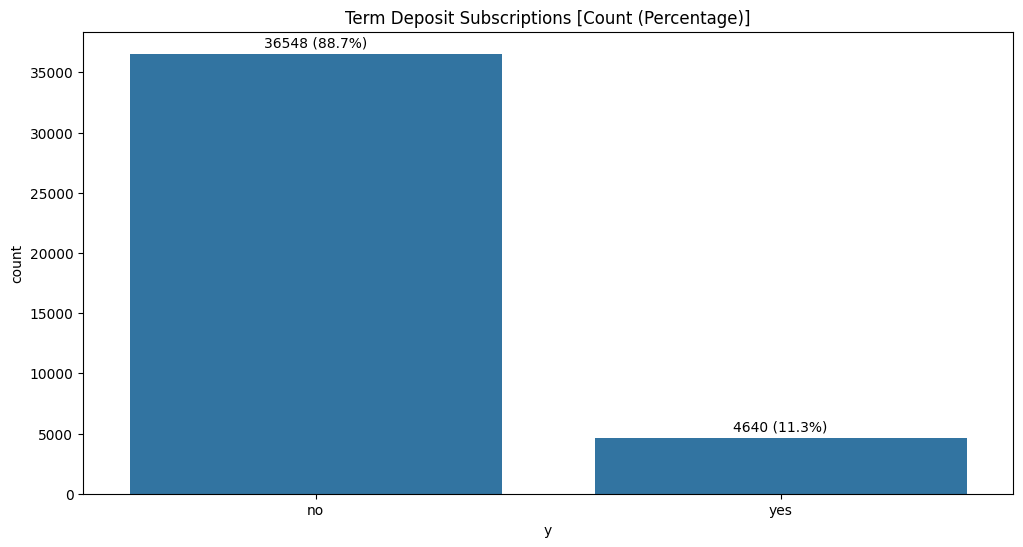

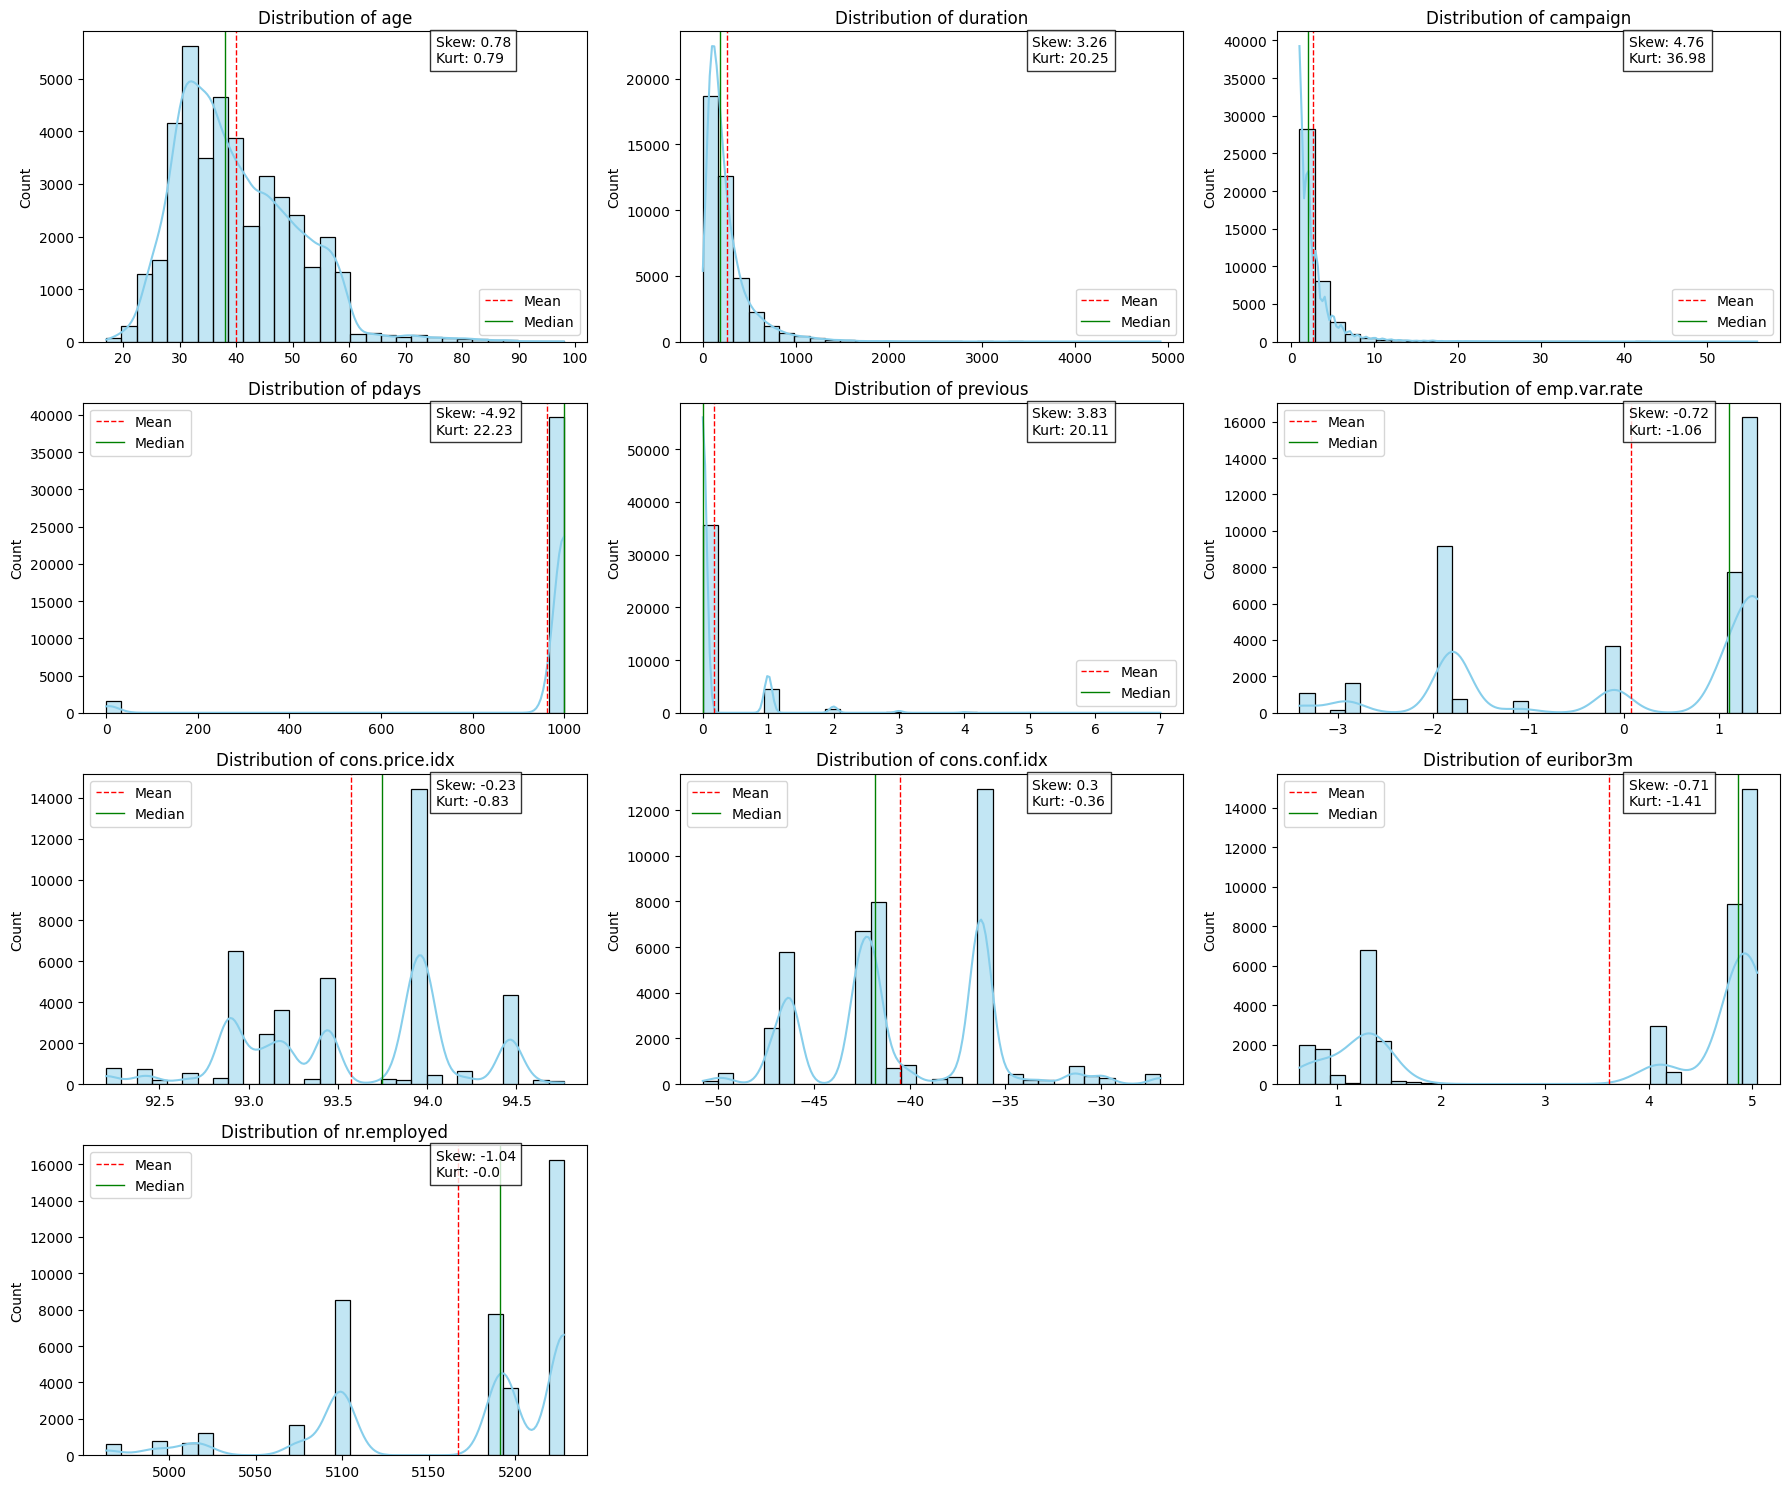

In [9]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='y', data=df)

percentages = (df['y'].value_counts(normalize=True)*(100)).round(1)
counts = df['y'].value_counts()

for bar in ax.containers:
    ax.bar_label(bar, labels=[f'{counts.iloc[i]} ({percentages.iloc[i]}%)' for i in range(len(counts))], padding=3)

plt.title('Term Deposit Subscriptions [Count (Percentage)]')



plt.figure(figsize=(18, 15))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')

    plt.axvline(df[col].mean(), color='red', linestyle='--', linewidth=1, label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='-', linewidth=1, label='Median')
    
    skewness = df[col].skew().round(2)
    kurtosis = df[col].kurtosis().round(2)
    plt.text(0.7, 0.9, f'Skew: {skewness}\nKurt: {kurtosis}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')
    plt.legend()


plt.tight_layout()
plt.show()

#### Correlation matrix for numerical features

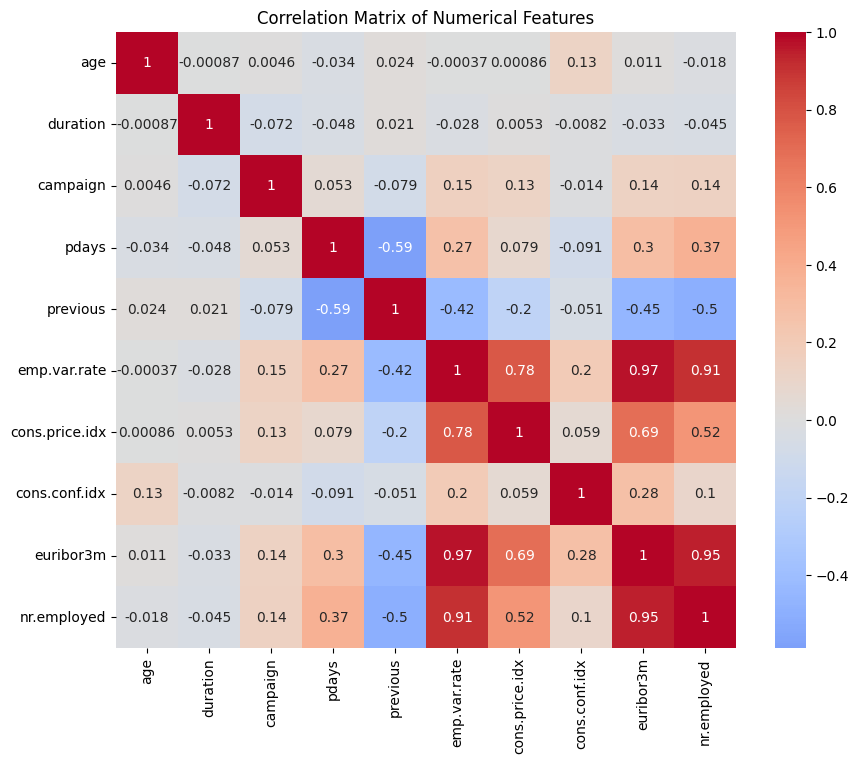

In [61]:


plt.figure(figsize=(10,8))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [62]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### subscription as per age

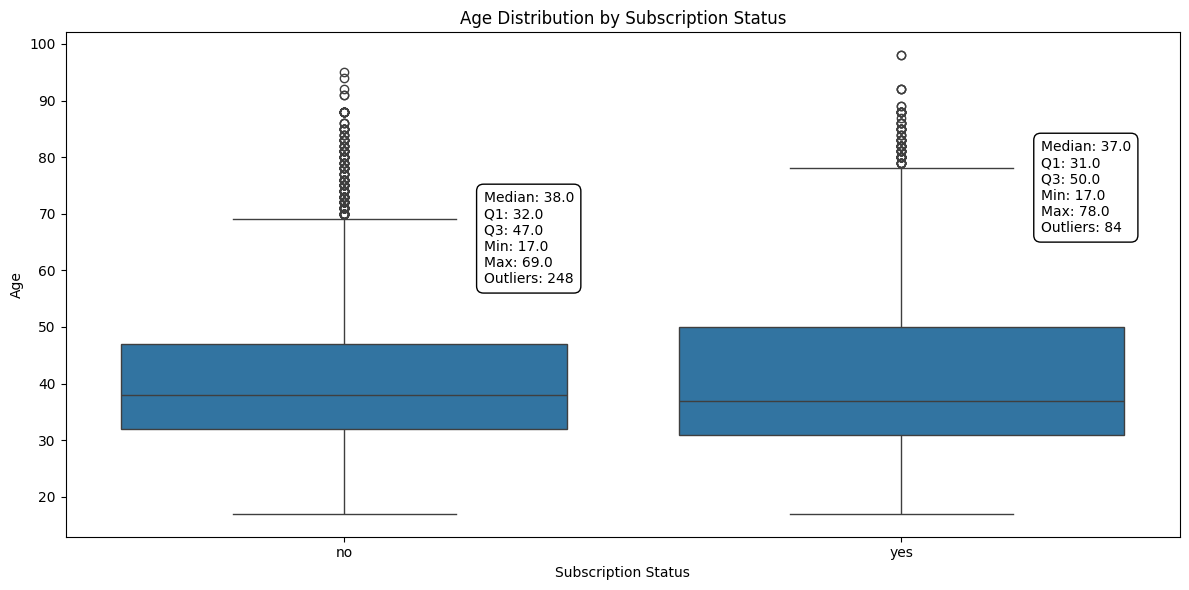

In [10]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='y', y='age', data=df)

plt.title('Age Distribution by Subscription Status')
plt.ylabel('Age')
plt.xlabel('Subscription Status')

groups = df['y'].unique()
for i, group in enumerate(groups):
    ages = df[df['y'] == group]['age']
    
    q1 = np.percentile(ages, 25)
    q3 = np.percentile(ages, 75)
    median = np.median(ages)
    iqr = q3 - q1
    lower_whisker = max(ages[ages >= q1 - 1.5 * iqr].min(), ages.min())
    upper_whisker = min(ages[ages <= q3 + 1.5 * iqr].max(), ages.max())
    outliers = ages[(ages < lower_whisker) | (ages > upper_whisker)]

    label = (f"Median: {median:.1f}\n"f"Q1: {q1:.1f}\n"f"Q3: {q3:.1f}\n"f"Min: {lower_whisker:.1f}\n"f"Max: {upper_whisker:.1f}\n"f"Outliers: {len(outliers)}")

    ax.text(i + 0.25, upper_whisker + 5, label,ha='left', va='top', fontsize=10,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

#### subscription rate by Call duration

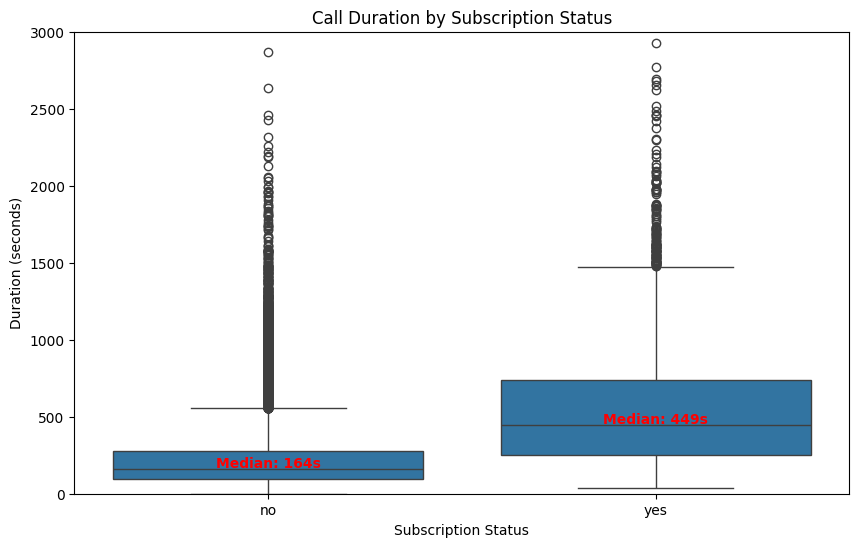

In [11]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10,6))

ax = sns.boxplot(x='y', y='duration', data=df)

plt.title('Call Duration by Subscription Status')
plt.ylabel('Duration (seconds)')
plt.xlabel('Subscription Status')
plt.ylim(0, 3000)

medians = df.groupby('y')['duration'].median()

for i, median in enumerate(medians):
    ax.text(i, median + 10, f'Median: {median:.0f}s', horizontalalignment='center', size='medium', color='red', weight='semibold')
plt.show()


#### subscription by job distribution

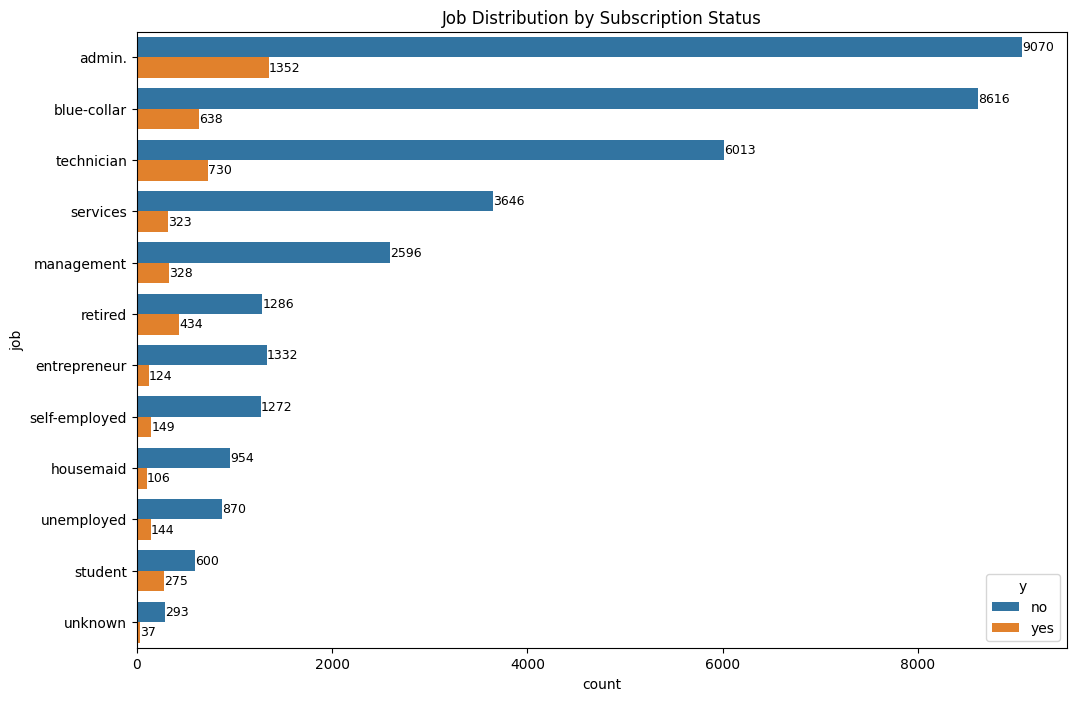

In [12]:
plt.figure(figsize=(12,8))
ax=sns.countplot(y='job', hue='y', data=df, order=df['job'].value_counts().index)
for bar in ax.containers:
    ax.bar_label(bar,fmt='%d',label_type='edge',fontsize=9)
plt.title('Job Distribution by Subscription Status')

plt.show()

#### subscription by Month contacted

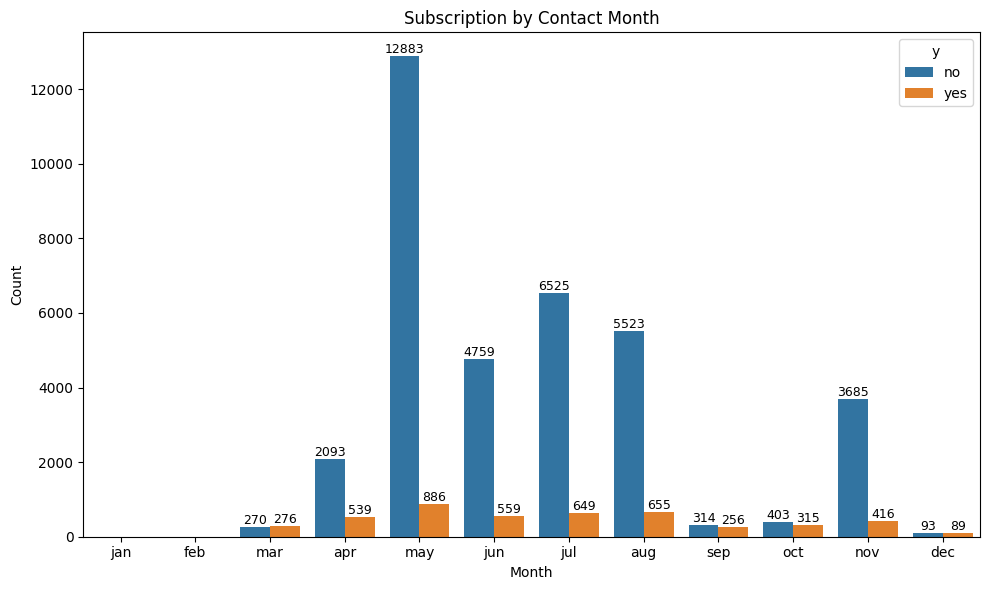

In [13]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='month', hue='y', data=df, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

plt.title('Subscription by Contact Month')
plt.xlabel('Month')
plt.ylabel('Count')

for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


#### subscription rate by previous Month contact

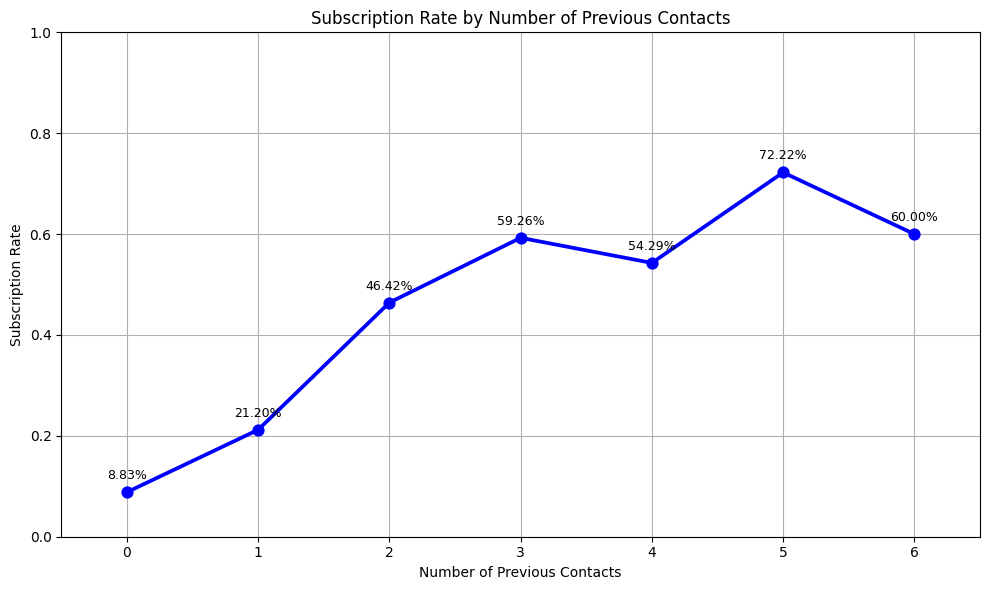

In [14]:
subset = df[df['previous'] <= 6]
rate = subset.groupby('previous')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(10,6))
ax = sns.pointplot(x=rate.index, y=rate.values, markers='o', linestyles='-', color='blue')

plt.title('Subscription Rate by Number of Previous Contacts')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Subscription Rate')
plt.ylim(0, 1)
plt.grid(True)

for x, y in zip(rate.index, rate.values):
    ax.text(x, y + 0.02, f'{y:.2%}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# Conclusion:

## This exploratory analysis of the bank marketing dataset revealed several important behavioral and demographic patterns that can inform future campaign strategies and predictive modeling:


## Age Distribution Shows Subtle Patterns:

 #### While the age distributions of subscribers and non-subscribers largely overlap, subscribers tend to have a slightly higher third quartile (Q3), suggesting that older clients may be marginally more inclined to subscribe. However, age alone may not be a strong predictor and should be considered alongside other features.

## Call Duration Matters :

#### Clients who subscribed to term deposits had significantly longer call durations, suggesting that sustained engagement during calls is a strong indicator of conversion. This highlights the importance of call quality and client interaction time.

## Occupation Influences Subscription :

#### Job categories such as *student*, *retired*, and *entrepreneur* showed higher subscription rates, while *blue-collar* and *services* roles had lower engagement. This suggests that occupation is a meaningful feature for segmentation and targeting.

## Seasonal Trends in Contact Month :

#### Subscription behavior varied across months. While May had the highest contact volume, it did not correspond to the highest subscription rate. Months like *March*, *September*, and *December* showed better conversion ratios, indicating that timing and seasonality may affect campaign success.


## Previous Contact History Boosts Conversion :

#### Clients with prior contact history were more likely to subscribe, with subscription rates increasing steadily up to 5–6 previous contacts. This supports the value of persistent but measured follow-up in marketing efforts.

### These findings provide a strong foundation for further **feature engineering**, **predictive modeling**, and **campaign optimization**. By leveraging these insights, future marketing strategies can be more targeted, data-driven, and effective in improving subscription rates.
